# 多分类

请使用jupyter完成相关代码的运行。 若未安装该依赖，直接阅读该 pdf 文件同样可以获取练习结果。

---

## 算法步骤

![img](./img/1.png)

---

## 准备工作

### 导入依赖。

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### Softmax 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Softmax function），公式为： \\[g\left( v_i \right)=\frac{{{e}^{v_i}}}{sum({{e}^{v_i}})}\\] 

In [11]:
def softmax(z):
    '''
    softmax 函数
    Args:
        z (m, n): 输入
    Returns:
        g (m, n): softmax 函数输出
    '''
    d = np.exp(z)
    # 注意 d sum时的axis
    return d / d.sum(axis = 1).reshape(-1, 1)

### Softmax函数的梯度的函数

In [12]:
def softmax_gradient(z):
    return np.multiply(softmax(z), (1 - softmax(z)))

### 前向传播函数

单隐层网络，注意偏置 b = 0。

In [13]:
def forward_propagate(X, theta1, theta2):
    '''
    前向传播函数
    Args:
        X (m, n): m个样本，n个特征
        theta1 (t, n): t个神经元
        theta2 (k, t): k个输出
    Returns:
        a1 (m, n)
        z2 (m, t)
        a2 (m, t)
        z3 (m, k)
        h (m, k)
    '''
    m = X.shape[0]

    # 激活项a, 线性输出z
    a1 = X
    z2 = a1 * theta1.T
    a2 = softmax(z2)
    z3 = a2 * theta2.T
    h = softmax(z3)

    return a1, z2, a2, z3, h

### 代价函数

交叉熵代价函数。

![img](./img/nn_cost.png)

In [14]:
def cost_fcn(params, input_size, hidden_size, num_labels, X, y):
    '''
    交叉熵代价函数
    Args:
        params (hidden_size * input_size + num_labels * hidden_size, ): 参数
        input_size (int): 输入的特征数
        hidden_size (int): 隐藏层的神经元数
        num_labels (int): 输出层神经元数/类别数
        X (m, n): m个样本，n个特征
        y (m, k): 真实值, k个类别
    Returns:
        cost (int): 代价
    '''
    m = X.shape[0]
    X = np.matrix(X)
    y = np.matrix(y)
    
    # reshape the parameter array into parameter matrices for each layer
    theta1 = np.matrix(np.reshape(params[:hidden_size * input_size], (hidden_size, input_size)))
    theta2 = np.matrix(np.reshape(params[hidden_size * input_size:], (num_labels, hidden_size)))
    
    # run the feed-forward pass
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # compute the cost
    J = np.multiply(-y, np.log(h)) - np.multiply((1 - y), np.log(1 - h))
    cost = J.sum().sum() / m

    return cost

### BP算法

交叉熵代价函数 + Softmax。

In [15]:
def backprop(params, input_size, hidden_size, num_labels, X, y):
    '''
    执行反向传播并返回代价和梯度
    Args:
        params (hidden_size * input_size + num_labels * hidden_size, ): 参数
        input_size (int): 输入的特征数
        hidden_size (int): 隐藏层的神经元数
        num_labels (int): 输出层神经元数/类别数
        X (m, n): m个样本，n个特征
        y (m, k): 真实值, k个类别
    Returns:
        cost (int): 代价
        grad (hidden_size * input_size + num_labels * hidden_size, ): 梯度
    '''
        
    m = X.shape[0]
    
    # 将参数数组重构为每一层的参数矩阵
    theta1 = np.matrix(np.reshape(params[:hidden_size * input_size], (hidden_size, input_size)))
    theta2 = np.matrix(np.reshape(params[hidden_size * input_size:], (num_labels, hidden_size)))
    
    # 前向传播
    a1, z2, a2, z3, h = forward_propagate(X, theta1, theta2)
    
    # 计算损失
    J = np.multiply(-y, np.log(h)) - np.multiply((1 - y), np.log(1 - h))
    cost = J.sum().sum() / m
    
    # 误差反向传播
    error3 = h - y
    delta3 = error3
    error2 = delta3 @ theta2
    delta2 = np.multiply(error2, softmax_gradient(z2))
    # 计算梯度  
    grad2 = delta3.T @ a2 / m 
    grad1 = delta2.T @ a1 / m
    
    # 将梯度矩阵分解成单个数组
    grad = np.concatenate((np.ravel(grad1), np.ravel(grad2)))
    
    return cost, grad

训练函数。

In [16]:
def train(X, y, params, input_size, hidden_size, num_labels, alpha, iters, step = -1):
    '''
    训练函数
    Args:
        X (m, n): m个样本，n个特征
        y (m, k): 真实值, k个类别
        params (hidden_size * input_size + num_labels * hidden_size, ): 参数
        input_size (int): 输入的特征数
        hidden_size (int): 隐藏层的神经元数
        num_labels (int): 输出层神经元数/类别数
        alpha (int): 学习率
        iters (int): 最大迭代次数
        step (int): 每组样本的数量
    Returns:
        g(1, n): 参数最终值
        cost(iters, 1): 代价函数历史值
    '''
    m = X.shape[0]
    g = params.copy()
    cost = np.matrix(np.zeros((iters, 1)))
    
    # 默认为批量
    if step == -1:
        step = m
    
    for i in range(iters):
        for j in range(0, m, step):
            Xs = X[j:j+step, :]
            ys = y[j:j+step]
            
            # 计算梯度和损失
            J, grad = backprop(g, input_size, hidden_size, num_labels, X, y)
            
            g = g - alpha * grad
            cost[i, 0] = J

    return g, cost

---

## 作业9

设计多分类问题的网络结构。

输入层节点数：25
隐层节点数：50
输出层节点数：5

In [17]:
# 初始化设置
input_size = 25
hidden_size = 50
num_labels = 5
alpha = 0.9
epoch = 2000

## 作业10

用训练数据训练网络，用测试数据测试训练结果(注:运行多次观察结果是否变化，思考原因)

![img](./img/10.png)

1500
训练数据网络预测值：
[[9.88315749e-01 1.16188942e-02 2.10188552e-08 4.14332457e-05
  2.39025936e-05]
 [1.21000060e-02 9.70252753e-01 1.21082060e-02 2.42890237e-03
  3.11013253e-03]
 [2.14196517e-08 1.15971368e-02 9.88324558e-01 2.03888613e-05
  5.78945873e-05]
 [1.30778375e-03 2.29781026e-03 1.13517746e-03 9.94406481e-01
  8.52747618e-04]
 [1.34777396e-03 3.52418374e-03 1.70465859e-03 9.40526649e-04
  9.92482857e-01]]
训练数据损失: [[0.02668829]]

测试数据网络预测值: 
[[2]
 [3]
 [3]
 [3]
 [3]]
测试数据损失: 6.974227931555005


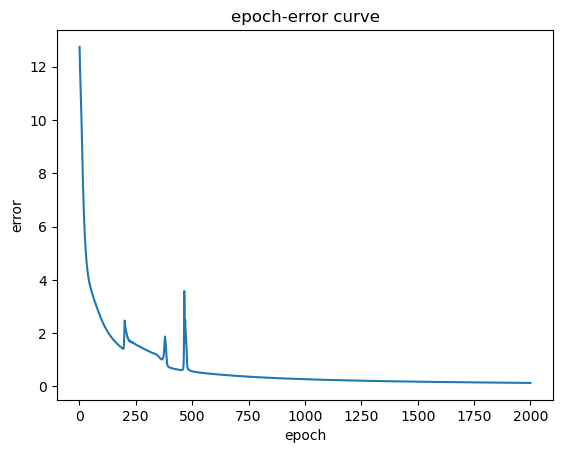

In [22]:
# 数据
X = np.array([[[0, 1, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 1, 1, 1, 0]],
             
              [[1, 1, 1, 1, 0],
               [0, 0, 0, 0, 1],
               [0, 1, 1, 1, 0],
               [1, 0, 0, 0, 0],
               [1, 1, 1, 1, 1]],
              
              [[1, 1, 1, 1, 0],
               [0, 0, 0, 0, 1],
               [0, 1, 1, 1, 0],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 0]],
              
              [[0, 0, 0, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 1, 0, 1, 0],
               [1, 1, 1, 1, 1],
               [0, 0, 0, 1, 0]],
              
              [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0],
               [1, 1, 1, 1, 0],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 0]]])

testdata = np.array([[[0, 0, 1, 1, 0],
                       [0, 0, 1, 1, 0],
                       [0, 1, 0, 1, 0],
                       [0, 0, 0, 1, 0],
                       [0, 1, 1, 1, 0]],

                      [[1, 1, 1, 1, 0],
                       [0, 0, 0, 0, 1],
                       [0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [1, 1, 1, 1, 1]],

                      [[1, 1, 1, 1, 0],
                       [0, 0, 0, 0, 1],
                       [0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [1, 1, 1, 1, 0]],

                      [[0, 1, 1, 1, 0],
                       [0, 1, 0, 0, 0],
                       [0, 1, 1, 1, 0],
                       [0, 0, 0, 1, 0],
                       [0, 1, 1, 1, 0]],

                      [[0, 1, 1, 1, 1],
                       [0, 1, 0, 0, 0],
                       [0, 1, 1, 1, 0],
                       [0, 0, 0, 1, 0],
                       [1, 1, 1, 1, 0]]])

y = np.eye(5)

X = X.transpose(0, 2, 1).reshape(5, 25)
m = X.shape[0]
X = np.matrix(X)
y = np.matrix(y)

# 随机初始化完整网络参数大小的参数数组
params = np.random.random(size = hidden_size * input_size + num_labels * hidden_size) * 2 - 1

# 训练
thetas, cost = train(X, y, params, input_size, hidden_size, num_labels, alpha, epoch)

# 观察输出
testdata = testdata.transpose(0, 2, 1).reshape(5, 25)
testdata = np.matrix(testdata)
ytest = np.eye(5)
ytest[3,3] = 0
ytest[3,4] = 1
theta1 = np.reshape(thetas[:hidden_size * input_size], (hidden_size, input_size))
theta2 = np.reshape(thetas[hidden_size * input_size:], (num_labels, hidden_size))
print(f'''训练数据网络预测值：\n{forward_propagate(X, theta1, theta2)[-1]}
训练数据损失: {cost[-1]}

测试数据网络预测值: \n{forward_propagate(testdata, theta1, theta2)[-1].argmax(axis=1)+1}
测试数据损失: {cost_fcn(thetas, input_size, hidden_size, num_labels, testdata, ytest)}''')

# 绘制曲线
fig, ax = plt.subplots()
t = np.linspace(1, epoch, epoch)                # 创建t的取值范围
ax.plot(t, m * cost)                            # 作误差曲线

ax.set_xlabel('epoch')
ax.set_ylabel('error')
ax.set_title('epoch-error curve')

plt.show() 

为便于观察，使用argmax函数展现测试数据的预测结果，多次测试结果多次出现变化。

原因：
需要更加丰富的特征(5 x 5过少)和更大的训练集。

加上偏置。

---

## 作业11

尝试构造其它测试数据测试网络。

In [16]:
testdata = np.array([[[0, 0, 0, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [0, 0, 1, 0, 0],
               [1, 1, 1, 1, 1]],
             
              [[0, 0, 1, 1, 1],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0],
               [1, 1, 1, 0, 0]],
              
              [[1, 1, 1, 1, 1],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]],
              
              [[0, 0, 0, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 1, 1, 1, 0],
               [1, 1, 1, 1, 1],
               [0, 0, 0, 1, 0]],
              
              [[1, 1, 1, 1, 1],
               [1, 0, 0, 0, 0],
               [1, 1, 1, 1, 1],
               [0, 0, 0, 0, 1],
               [1, 1, 1, 1, 1]]])

testdata = testdata.transpose(0, 2, 1).reshape(5, 25)
testdata = np.matrix(testdata)
ytest = np.eye(5)
print(f'''测试数据网络预测值: \n{forward_propagate(testdata, theta1, theta2)[-1].argmax(axis=1)+1}
测试数据损失: {cost_fcn(thetas, input_size, hidden_size, num_labels, testdata, ytest)}''')

测试数据网络预测值: 
[[1]
 [2]
 [5]
 [4]
 [5]]
测试数据损失: 0.4228558371104397
